# Here we look at some data from Wine Reviews

https://www.kaggle.com/zynicide/wine-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### We load our Wine Reviews csv file:

In [2]:
wineReviews = pd.read_csv("http://knuth.luther.edu/~doroel01/winemag-data-130k-v2.csv", index_col=0)
wineReviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### Let's see data format, size, shape and if we have null values

In [3]:
wineReviews.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


We have 129908 rows and 14 columns. 

### Calculating the percentage of Null values

In [4]:
def MissingValues(df): 
    total = df.isnull().sum().sort_values(ascending = False) 
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False)
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    print(df[~(df['Total'] == 0)])
    return

MissingValues(wineReviews)

                       Total    Percent
region_2               79460  61.136715
designation            37465  28.825661
taster_twitter_handle  31213  24.015357
taster_name            26244  20.192197
region_1               21247  16.347493
price                   8996   6.921544
province                  63   0.048472
country                   63   0.048472
variety                    1   0.000769


Based on the heatmap, we have 4 variables with the a relative high (20%+) number of nulls

### Visualize the null values using our heatmap:

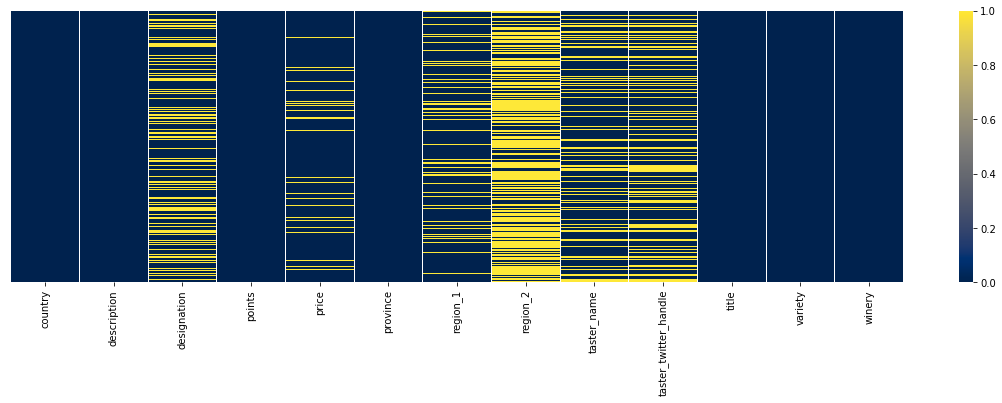

In [5]:
f = plt.figure(figsize=(20,5))
sns.heatmap(wineReviews.isnull(),yticklabels=False,cmap='cividis')
plt.show()

The heatmap shows that 6 columns in the dataset have variables with more than 6% number of nulls

### Checking the Unique Values

In [6]:
wineReviews.nunique()

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

## Are Points and Prices and Population Normally Distributed?

In [7]:
print("Statistics of numerical data: ")
print(wineReviews.describe())

Statistics of numerical data: 
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


We see very interesting distribuition of Points and Price.

1. The values of points are distributed between 80 and 100
2. The price have a high difference between the values and a high standard deviation

## Points Distribuition

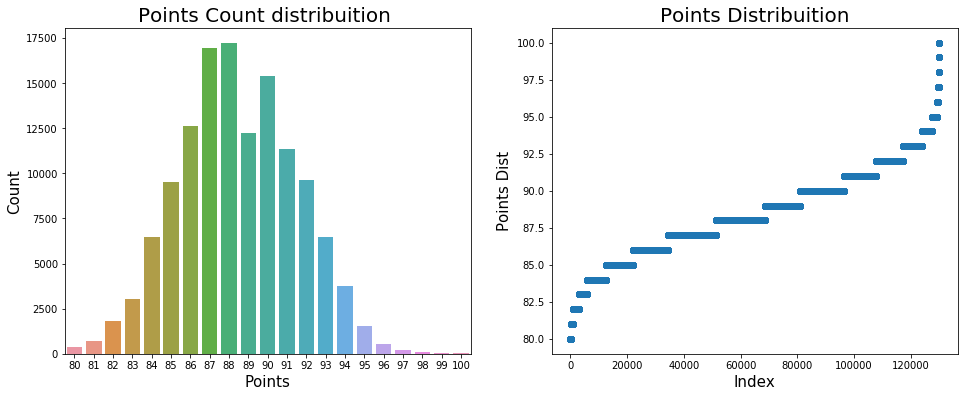

Percentiles of points: 
0.01    82.0
0.25    86.0
0.50    88.0
0.75    91.0
0.99    95.0
Name: points, dtype: float64


In [8]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
g = sns.countplot(x='points', data=wineReviews) 
g.set_title("Points Count distribuition ", fontsize=20) 
g.set_xlabel("Points", fontsize=15) 
g.set_ylabel("Count", fontsize=15) 

plt.subplot(1,2,2) 
plt.scatter(range(wineReviews.shape[0]), np.sort(wineReviews.points.values)) 
plt.xlabel('Index', fontsize=15) 
plt.ylabel('Points Dist', fontsize=15)  
plt.title("Points Distribuition", fontsize=20) 

plt.show()

print("Percentiles of points: ") 
print(wineReviews['points'].quantile([.01,.25,.5,.75,.99])) 

The histogram and the Quantile plots both show a normal distribution of points

## Price Distribution

/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


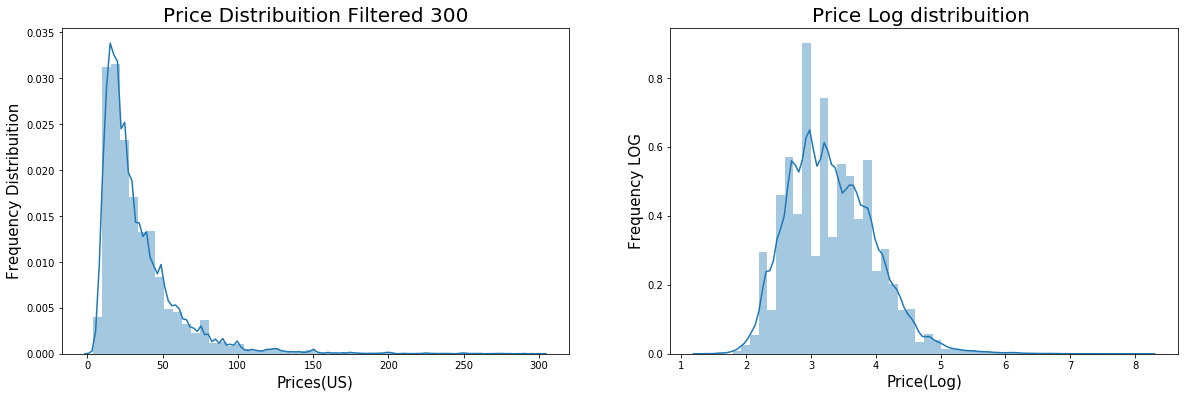

In [9]:
plt.figure(figsize=(20,6))

g = plt.subplot(121)
g = sns.distplot(wineReviews[wineReviews['price'] < 300]['price'])
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)

g1 = plt.subplot(122)
g1 = sns.distplot(np.log(wineReviews['price'].dropna()))
g1.set_title("Price Log distribuition ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.show()

## Are Points and Prices Correlated?

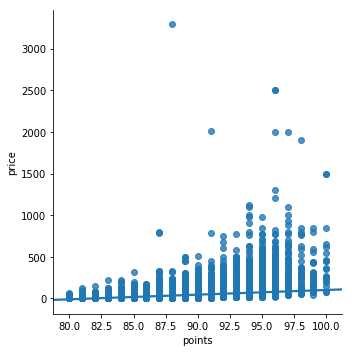

In [10]:
sns.lmplot(y = 'price', x='points', data=wineReviews)
plt.show()

In [11]:
wineReviews.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


Scatter plot interpretation:

1. The highest values isn't of the wine with highest points
2. The most expensive wine have points between 87 and 90

## How many wines are there with prices higher than USD 1500?

In [12]:
wineReviews.loc[(wineReviews['price'] > 1500)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


We have just 7 wines with values highest than 1500 USD. Moreover, It's interesting to note that the most expensive wine has the lowest points among all the 7 wines and that the almost all of them are from France.

## Are there any duplicates in our dataset?

In [13]:
wineReviews[wineReviews.duplicated('description',keep=False)].sort_values('description').head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


We decided to drop all duplicates based on the description column alone and subsequently all missing price data, we then check the size of our dataset again:

In [14]:
wineReviews = wineReviews.drop_duplicates('description')
wineReviews = wineReviews[pd.notnull(wineReviews.price)]
wineReviews.shape

(111567, 13)

# Country Exploration

### What is the distribution of the points by country?

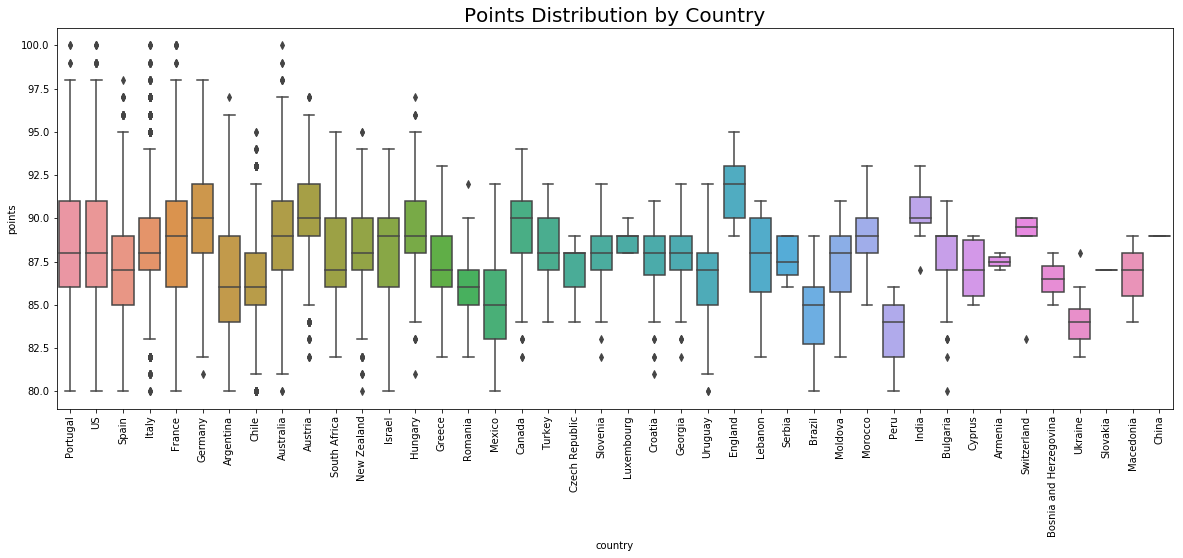

In [15]:
fig1, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=wineReviews, ax = ax)
plt.xticks(rotation = 90)
plt.title("Points Distribution by Country", fontsize=20)
plt.show()

As seen, countries like Slovakia, China, Armenia, and Switzerland have extremely low samples in our dataset

### Let's remove all countries with less than 100 observations and see the sample distribution

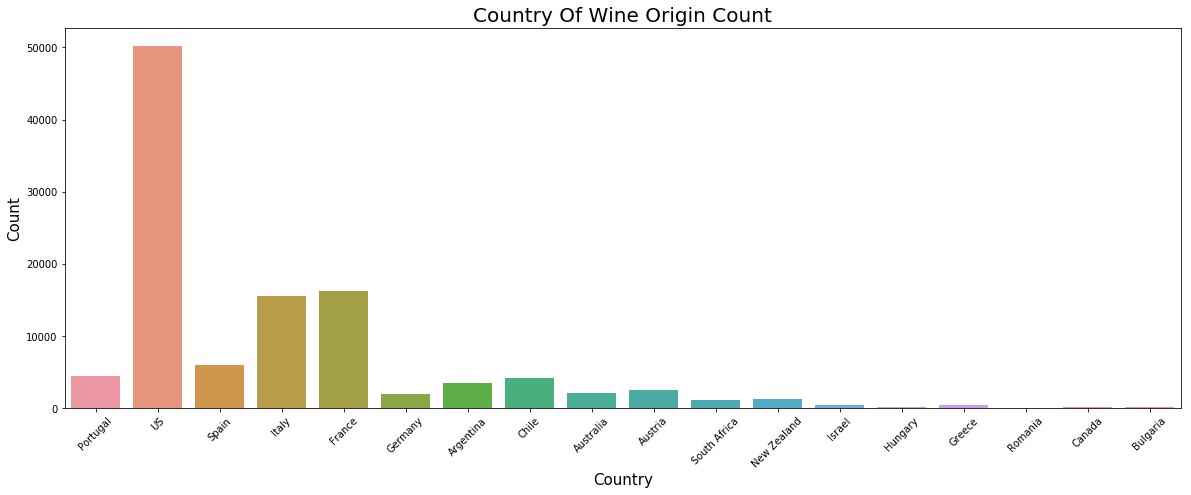

In [16]:
wineBycountry = wineReviews.country.value_counts()[:18]

fig2, ax = plt.subplots(figsize = (20,7))

g = sns.countplot(x='country', data=wineReviews[wineReviews.country.isin(wineBycountry.index.values)])
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

As seen in the bar chart above, US has the highest sample among all the countries following by Frace, Italy, Spain, Portugal, and so on.

### What is the average points of each country?

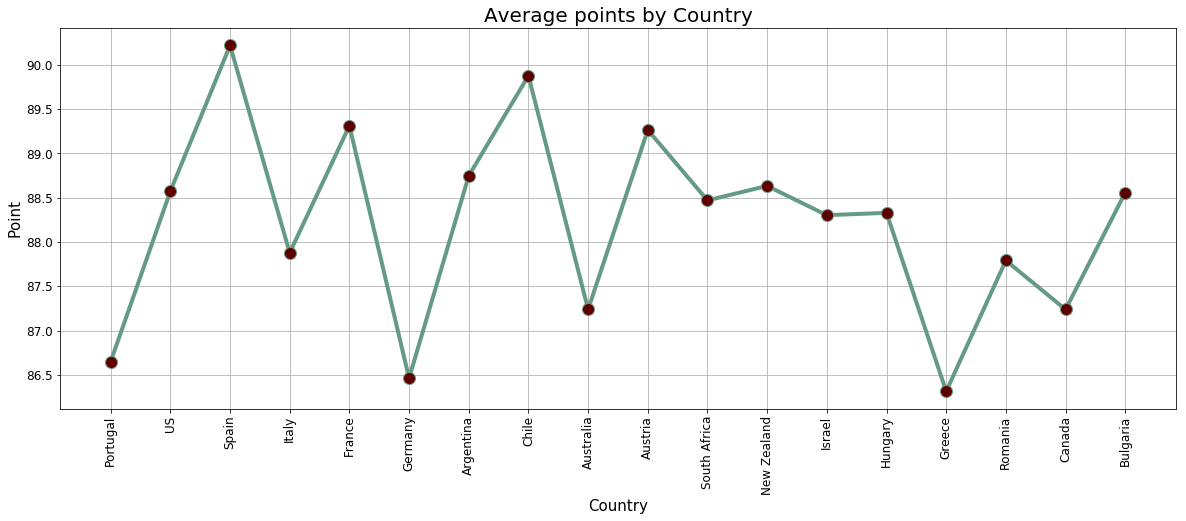

In [17]:
countryPoints = wineReviews.groupby('country').filter(lambda x: len(x) >100)

mean_points = countryPoints['points'].groupby(countryPoints['country']).mean()
mean_valuepoints = [mean_points[i] for i in range(len(mean_points))]

country_ = countryPoints.country.unique().tolist()

plt.figure(figsize=(20,7))
plt.plot(country_, mean_valuepoints,  marker='o', markerfacecolor='#5e0000', markersize=12, color='#659b84', linewidth=4)
plt.xticks( rotation=90)
plt.tick_params(axis = 'both', labelsize = 12)
plt.grid(True)
plt.title('Average points by Country', fontsize = 20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Point", fontsize=15)
plt.show()

After removing all countries with less than 100 observations, it appears that Austria, Canada, Germany, and Hungary have the highest median scores (points).

### What is the average price of wine in each country?

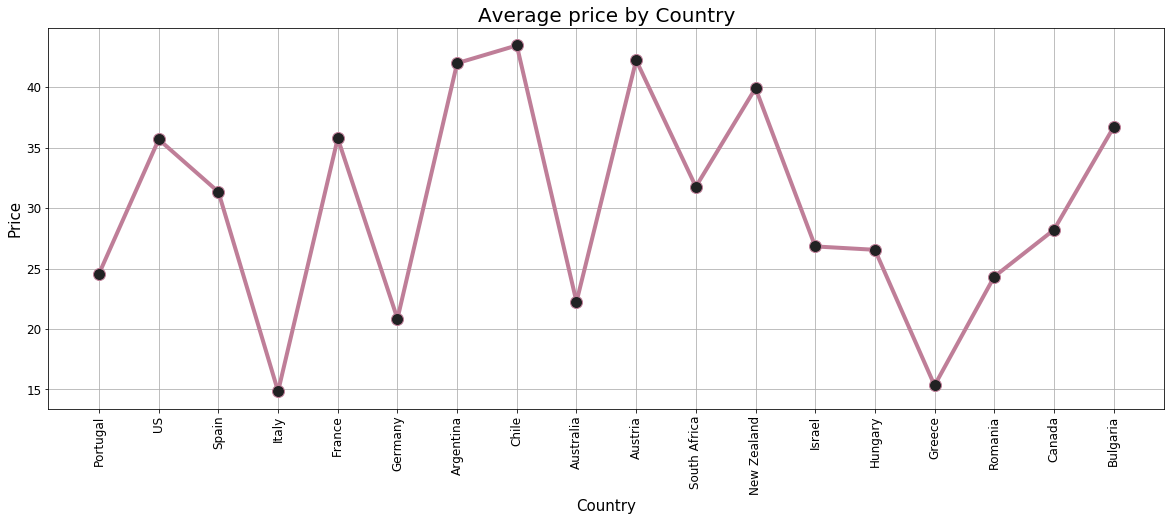

In [18]:
mean_price = countryPoints['price'].groupby(countryPoints['country']).mean()
mean_valueprice = [mean_price[i] for i in range(len(mean_price))]

plt.figure(figsize=(20,7))
plt.plot(country_, mean_valueprice, marker='o', markerfacecolor='#212223', markersize=12, color='#bf7e98', linewidth=4)
plt.xticks( rotation=90)
plt.tick_params(axis = 'both', labelsize = 12)
plt.grid(True)
plt.title('Average price by Country', fontsize = 20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

In [19]:
mean_price

country
Argentina       24.579429
Australia       35.686491
Austria         31.343195
Bulgaria        14.840909
Canada          35.776786
Chile           20.848184
France          41.994105
Germany         43.460789
Greece          22.246479
Hungary         42.234375
Israel          31.770419
Italy           39.928027
New Zealand     26.833065
Portugal        26.554198
Romania         15.333333
South Africa    24.332218
Spain           28.205654
US              36.697346
Name: price, dtype: float64

Based on the graph, we see that Germany has the highest mean of price for wines, followed by Hungary and France

# Province Exploration

## Which of the provinces have the highest sample size?

We want to show all provinces that have more than 1000 observations

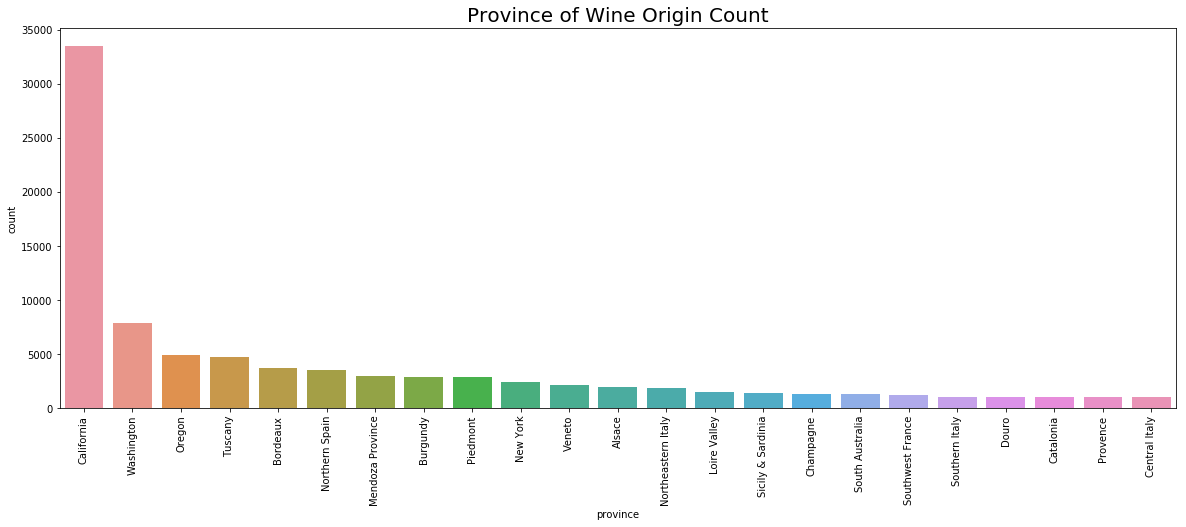

In [20]:
wineReviewsProv = wineReviews.groupby('province').filter(lambda x: len(x) >1000)
lit_ = wineReviewsProv.province.value_counts().index.tolist()
fig5, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='province', data=wineReviewsProv, order = lit_, ax=ax4)
plt.xticks(rotation = 90)
plt.title("Province of Wine Origin Count", fontsize=20)
plt.show()

Based on the bar chart above, California is the province with the highest observation in our dataset

# Plotting Provinces against the price of wines

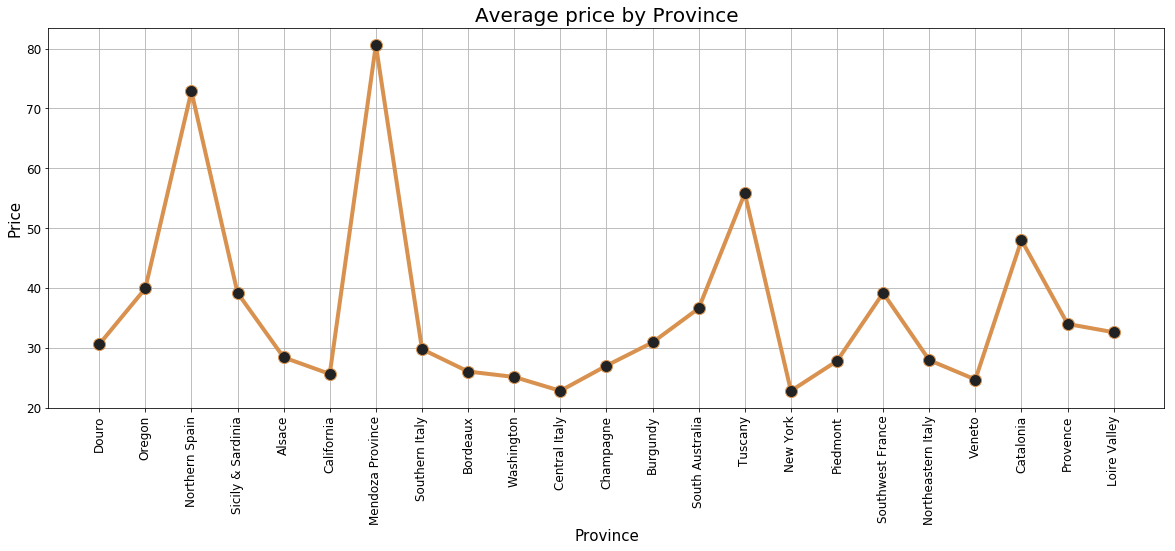

In [21]:
statistics_pts = wineReviewsProv['price'].groupby(wineReviewsProv['province']).mean()
mean_price = [statistics_pts[i] for i in range(len(statistics_pts))]

prov_ = wineReviewsProv.province.unique().tolist()

plt.figure(figsize=(20,7))
plt.plot(prov_, mean_price, marker='o', markerfacecolor='#212223', markersize=12, color='#d8914e', linewidth=4)
plt.xticks( rotation=90)
plt.tick_params(axis = 'both', labelsize = 12)
plt.grid(True)
plt.title('Average price by Province', fontsize = 20)
plt.xlabel("Province", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## Boxplot of Provinces vs. Points 

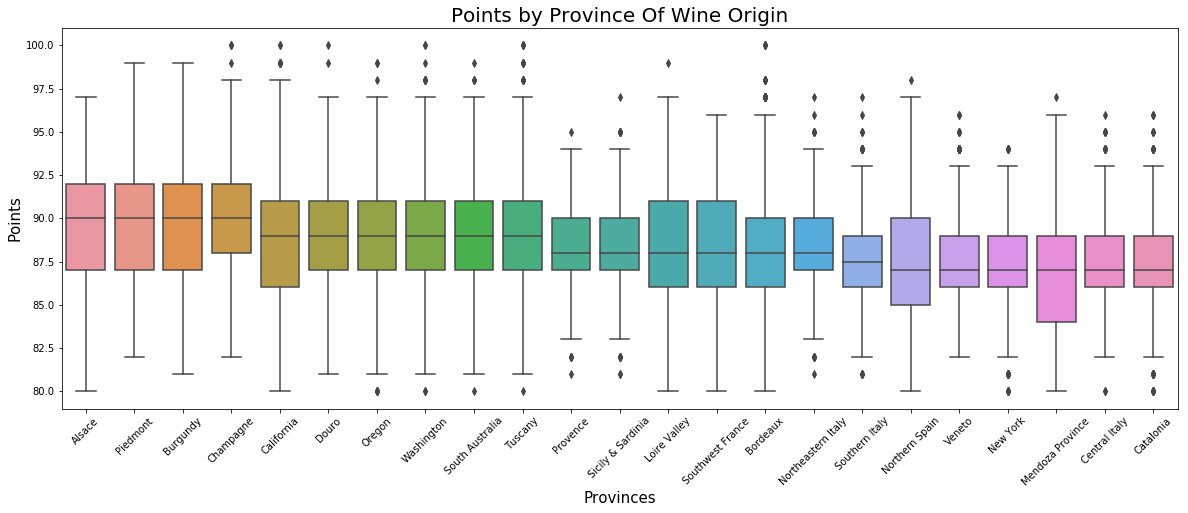

In [22]:
df1 = pd.DataFrame({col:vals['points'] for col,vals in wineReviewsProv.groupby('province')})
med_s = df1.median()
med_s.sort_values(ascending=False, inplace=True)

fig2, ax = plt.subplots(figsize = (20,7))
g2 = sns.boxplot(y='points', x='province',
                  data=wineReviewsProv, order = med_s.index)
g2.set_title("Points by Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.show()

# Wine Variety Exploration

There's a large variety of wines in the dataset. However, we found that there's an exponential decline in the number of observations for each wine type:

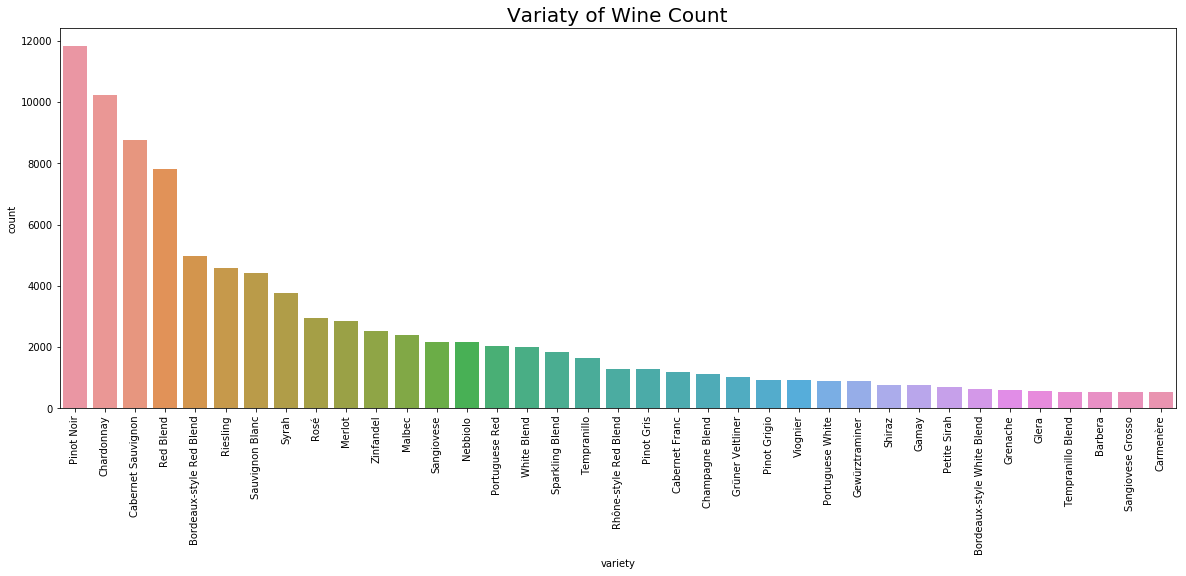

In [23]:
wineReviewsVar = wineReviews.groupby('variety').filter(lambda x: len(x) >500)
list_ = wineReviewsVar.variety.value_counts().index.tolist()
fig5, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=wineReviewsVar, order = list_, ax=ax4)
plt.xticks(rotation = 90)
plt.title("Variaty of Wine Count", fontsize=20)
plt.show()

Below is a violinplot chart containing all wine varieties (>200 observations) and their respective point distributions. Sangiovese Grosso appears to have the highest median score of all wines. Despite the variations, overall the point distibution is basically uniform.

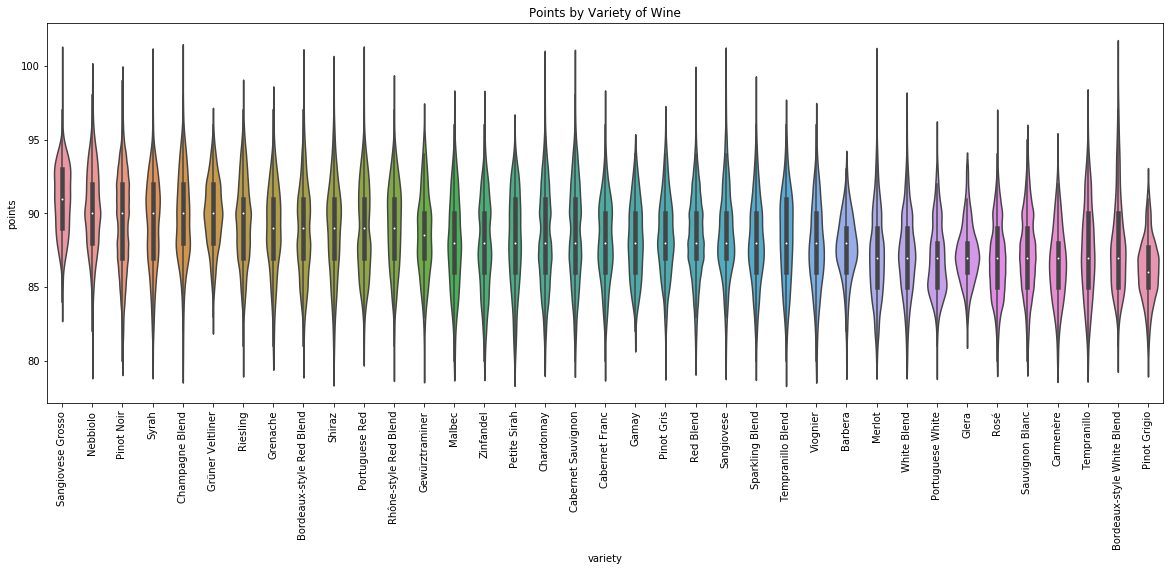

In [24]:
df2 = pd.DataFrame({col:vals['points'] for col,vals in wineReviewsVar.groupby('variety')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig2, ax = plt.subplots(figsize = (20,7))
sns.violinplot(
    x='variety',
    y='points',
    data=wineReviewsVar, order = meds.index)
plt.xticks(rotation = 90)
plt.title("Points by Variety of Wine")
plt.show()

However, there's clear variation when we look at the price of the wine variety:

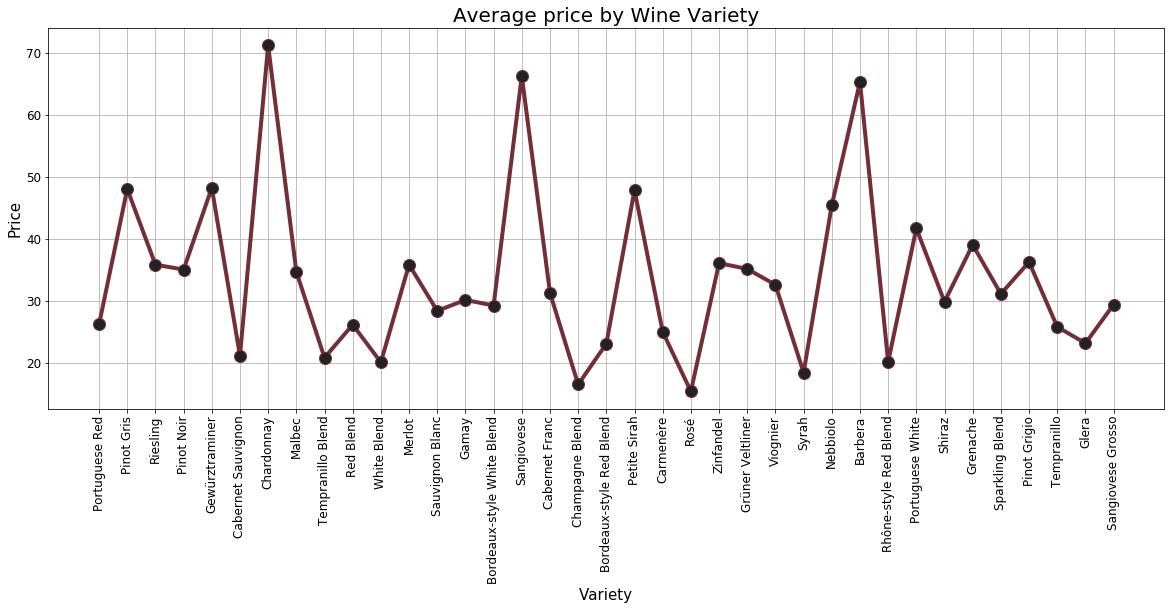

In [25]:
statistics_ = wineReviewsVar['price'].groupby(wineReviewsVar['variety']).mean()
mean_valprice = [statistics_[i] for i in range(len(statistics_))]

var_ = wineReviewsVar.variety.unique().tolist()

plt.figure(figsize=(20,7))
plt.plot(var_, mean_valprice, marker='o', markerfacecolor='#212223', markersize=12, color='#722f37', linewidth=4)
plt.xticks( rotation=90)
plt.tick_params(axis = 'both', labelsize = 12)
plt.grid(True)
plt.title('Average price by Wine Variety', fontsize = 20)
plt.xlabel("Variety", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

# Taster Names Exploration

## Plotting Taster Names against the Total count

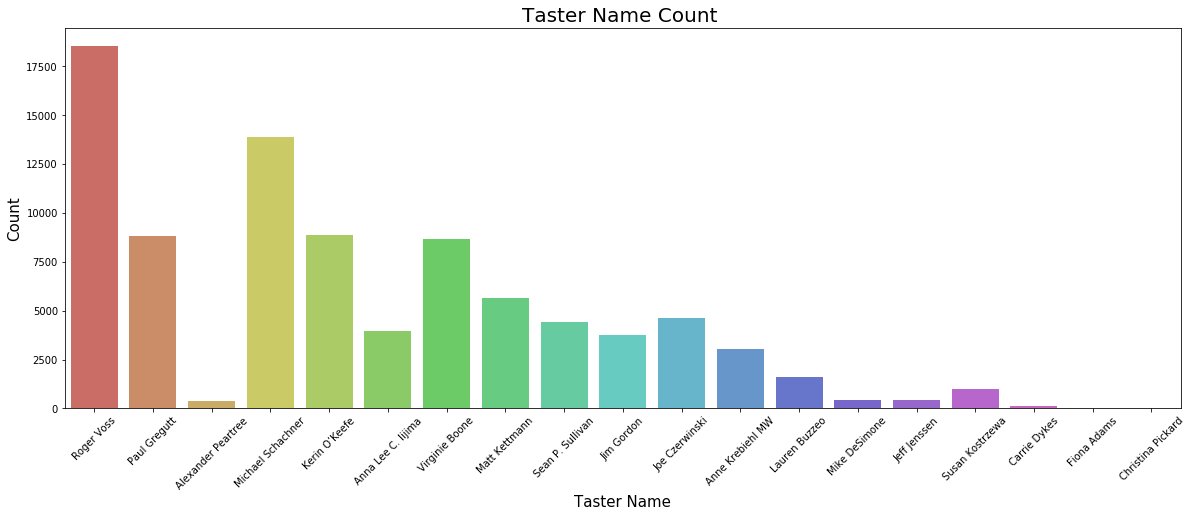

In [26]:
fig2, ax = plt.subplots(figsize = (20,7))
g = sns.countplot(x='taster_name', data=wineReviews, palette='hls')
g.set_title("Taster Name Count ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

## Plotting Taster Names against Wine Prices

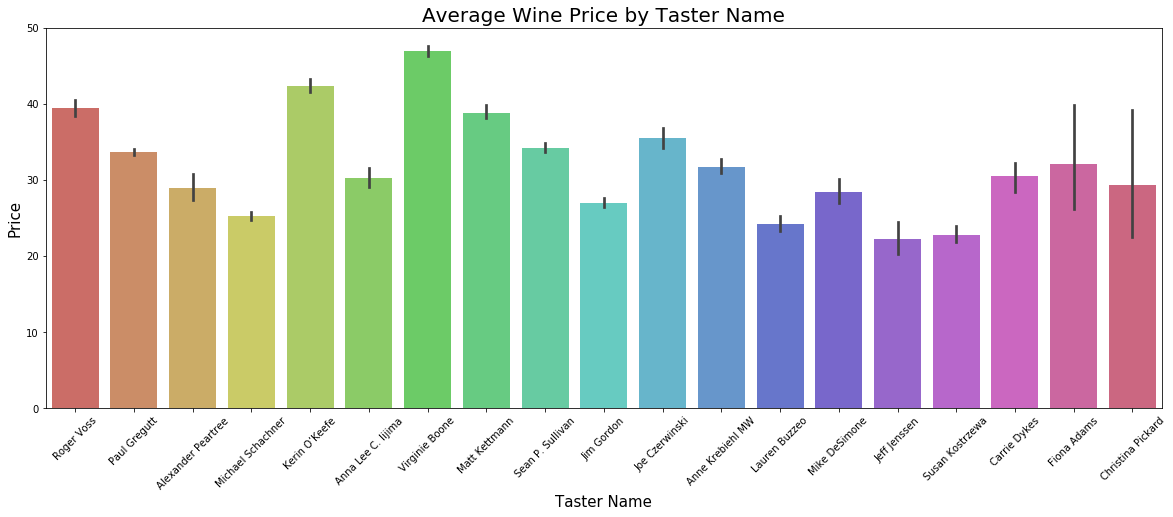

In [27]:
fig2, ax = plt.subplots(figsize = (20,7))
pricebp = sns.barplot(y='price', x='taster_name', data=wineReviews,
                 palette='hls')
pricebp.set_title("Average Wine Price by Taster Name", fontsize=20)
pricebp.set_xlabel("Taster Name", fontsize=15)
pricebp.set_ylabel("Price", fontsize=15)
pricebp.set_xticklabels(pricebp.get_xticklabels(),rotation=45)
plt.show()

Mean price for each wine taster in the barplot above

In [28]:
df3 = pd.DataFrame({col:vals['price'] for col,vals in wineReviews.groupby('taster_name')})
mean_ = df3.mean()
mean_.sort_values(ascending=False, inplace=True)
print(mean_)

Virginie Boone        46.884691
Kerin O’Keefe         42.398895
Roger Voss            39.433101
Matt Kettmann         38.855016
Joe Czerwinski        35.492785
Sean P. Sullivan      34.241520
Paul Gregutt          33.707140
Fiona Adams           32.041667
Anne Krebiehl MW      31.744975
Carrie Dykes          30.453125
Anna Lee C. Iijima    30.271263
Christina Pickard     29.333333
Alexander Peartree    28.937008
Mike DeSimone         28.442478
Jim Gordon            26.988833
Michael Schachner     25.261283
Lauren Buzzeo         24.197851
Susan Kostrzewa       22.783168
Jeff Jenssen          22.188073
dtype: float64


## BoxPlotting Taster Names against Wine Prices

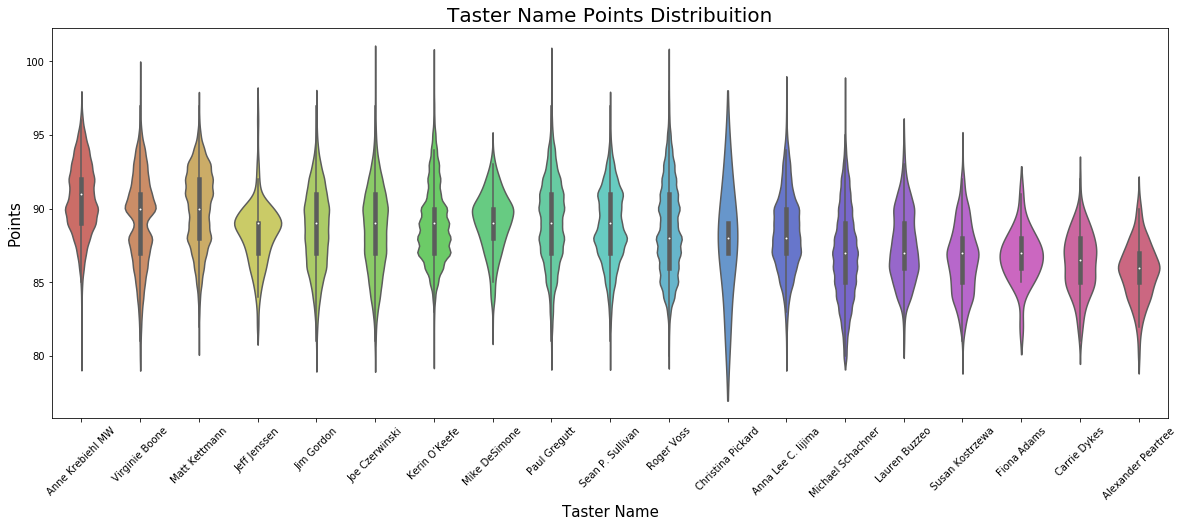

In [29]:
df4 = pd.DataFrame({col:vals['points'] for col,vals in wineReviews.groupby("taster_name")})
medp = df4.median()
medp.sort_values(ascending=False, inplace=True)

fig2, ax = plt.subplots(figsize = (20,7))
g2 = sns.violinplot(y='points', x='taster_name',
                  data=wineReviews, palette='hls', order= medp.index)
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

# Winery Distribution

We find the top 20 Winery based on their total observations

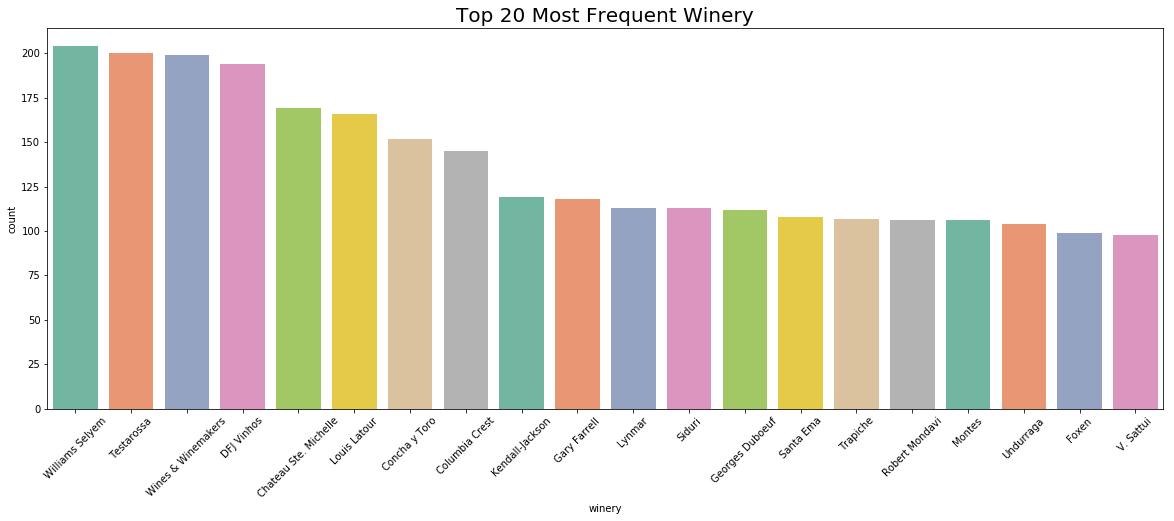

In [30]:
wineReviewsWinery = wineReviews.groupby('winery').filter(lambda x: len(x) >97)
lst_ = wineReviewsWinery.winery.value_counts().index.tolist()
fig5, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='winery', data=wineReviewsWinery, order = lst_,palette='Set2', ax=ax4)
plt.xticks(rotation = 45)
plt.title("Top 20 Most Frequent Winery", fontsize=20)
plt.show()

## BoxPlotting Price by Wineries

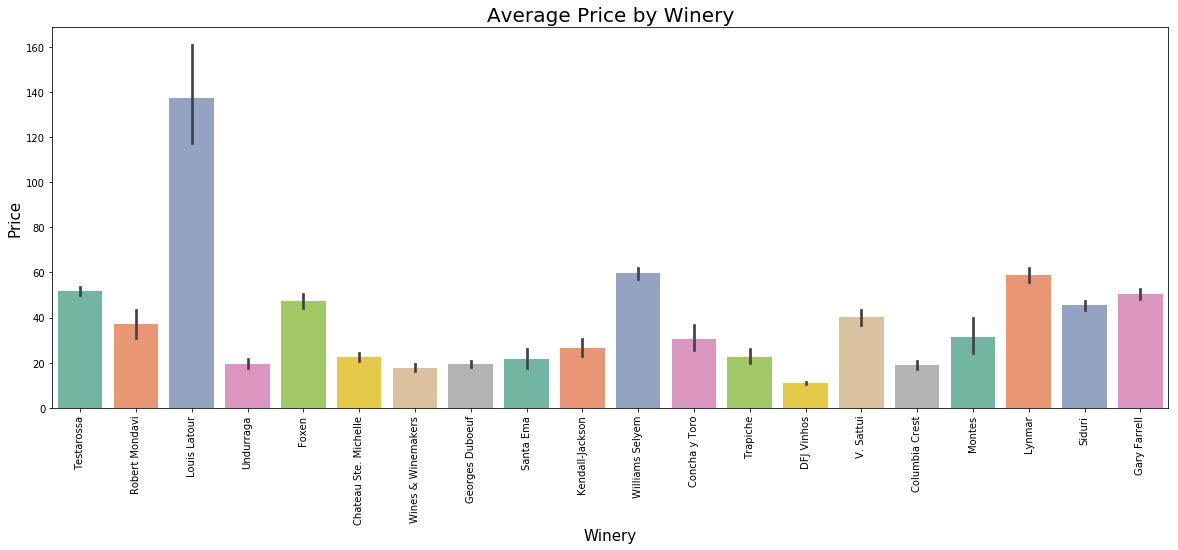

In [31]:
fig12, ax = plt.subplots(figsize = (20,7))
priceByWinery = sns.barplot(y='price', x='winery',
                  data=wineReviewsWinery, palette='Set2')
priceByWinery.set_title("Average Price by Winery", fontsize=20)
priceByWinery.set_xlabel("Winery", fontsize=15)
priceByWinery.set_ylabel("Price", fontsize=15)
priceByWinery.set_xticklabels(priceByWinery.get_xticklabels(),rotation=90)
plt.show()

## BoxPlotting Points by Wineries

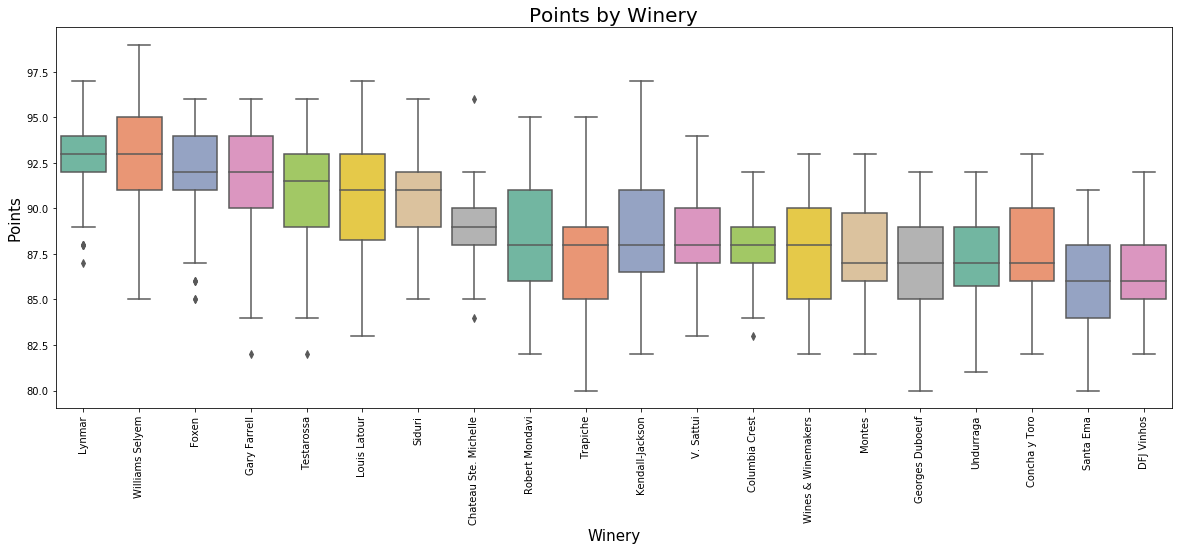

In [32]:
df5 = pd.DataFrame({col:vals['points'] for col,vals in wineReviewsWinery.groupby("winery")})
med5 = df5.median()
med5.sort_values(ascending=False, inplace=True)

fig12, ax = plt.subplots(figsize = (20,7))
pointsWinery = sns.boxplot(y='points', x='winery',
                  data=wineReviewsWinery, palette='Set2', order = med5.index)
pointsWinery.set_title("Points by Winery", fontsize=20)
pointsWinery.set_xlabel("Winery", fontsize=15)
pointsWinery.set_ylabel("Points", fontsize=15)
pointsWinery.set_xticklabels(pointsWinery.get_xticklabels(),rotation=90)
plt.show()

# Can we Analyse the Description? Let's find out...

## Does Description Length Affect the Wine Score (Points)? 

We create a box plot for description length vs. the points given to see whether or not descriptions correlate with the scores:

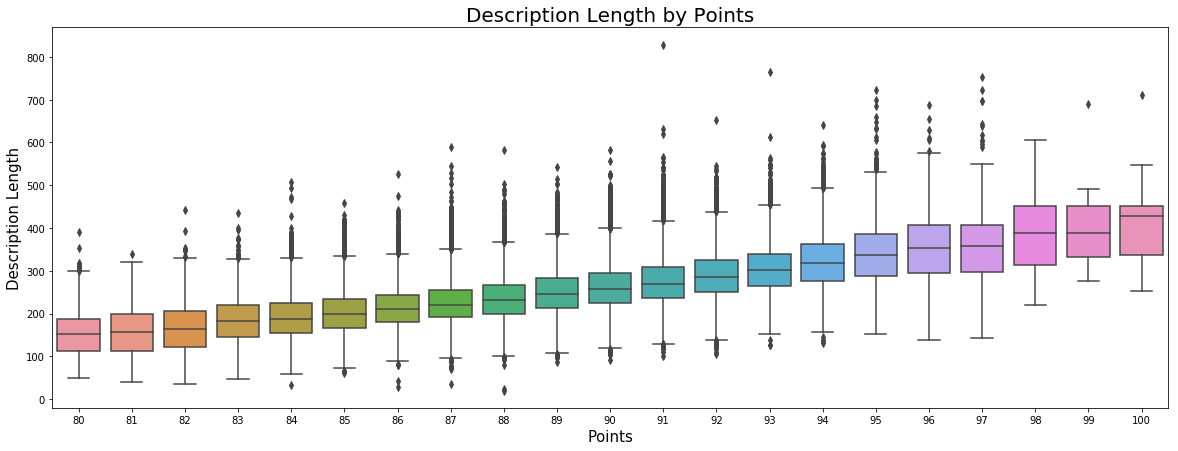

In [33]:
wineReviewsDesc = wineReviews.assign(desc_length = wineReviews['description'].apply(len))

plt.figure(figsize=(20,7))
g = sns.boxplot(x='points', y='desc_length', data=wineReviewsDesc )
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 15)
g.set_xlabel('Points', fontsize = 15) 
plt.show()

To our surprise, it turns out that high scores given by the wine taters have to do with the length of description provided. The median of the description length seem to increase with the increase of points of score. This suggests that the more information provided in the description of wine, the more information the tasters get, thus may lead to the causation of the high scores. 

## Who are the sommeliers with biggest descriptions length?!

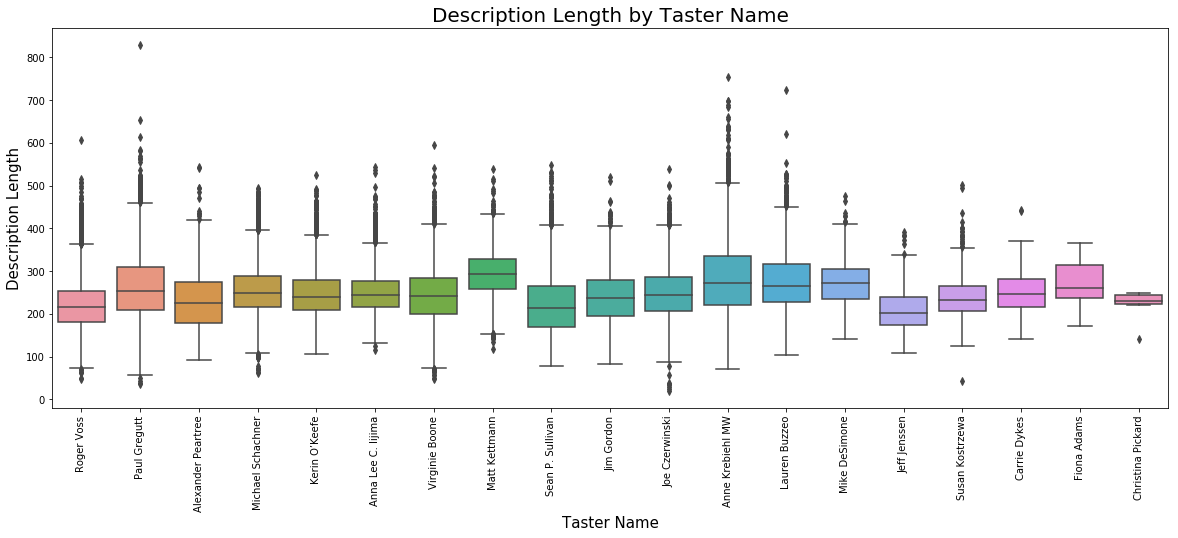

In [34]:
plt.figure(figsize=(20,7))

g = sns.boxplot(x='taster_name', y='desc_length', data=wineReviewsDesc)
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 15) 
g.set_xlabel('Taster Name', fontsize = 15) 
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

## Scatter plot of the description length and the price

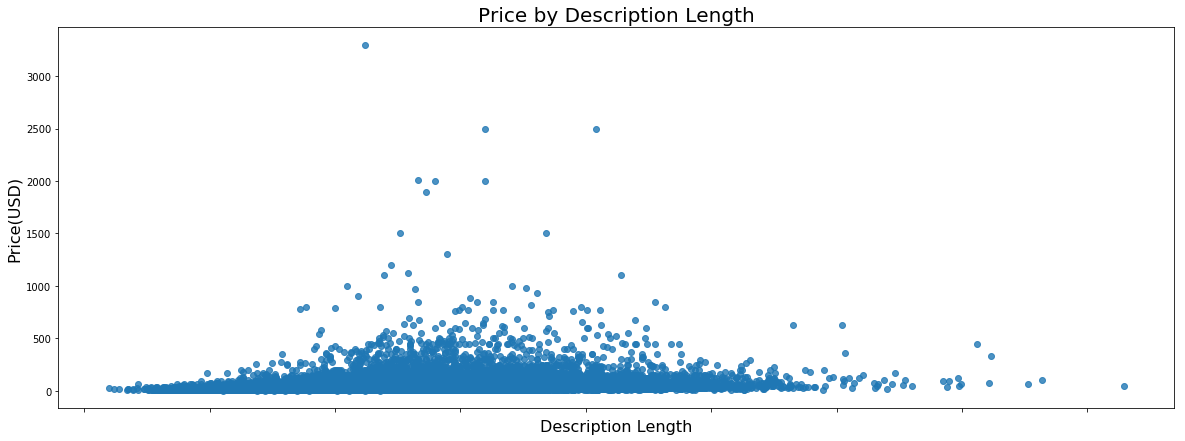

In [35]:
plt.figure(figsize=(20,7))

g = sns.regplot(x='desc_length', y='price',
                data=wineReviewsDesc, fit_reg=False)
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

In [36]:
wineReviewsDesc.corr()

,points,price,desc_length
points,1.000000,0.416566,0.580430
price,0.416566,1.000000,0.252126
desc_length,0.580430,0.252126,1.000000


# Wordcloud of Wine Titles

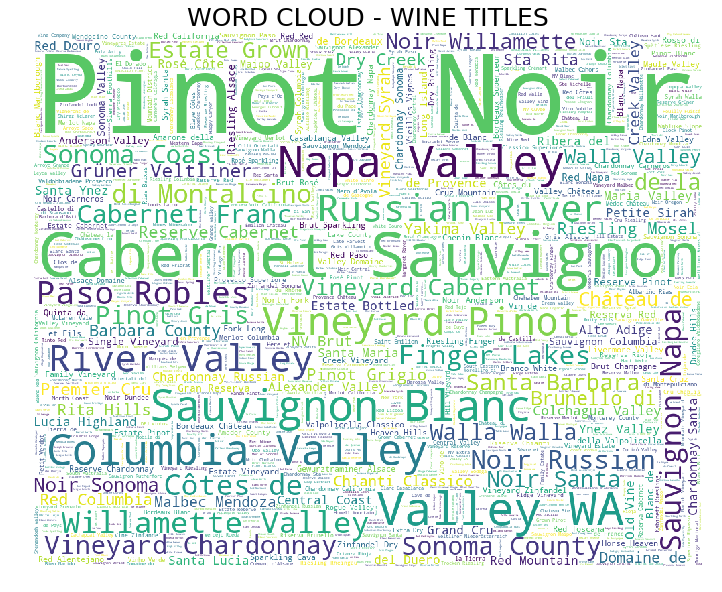

In [37]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(wineReviews['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - WINE TITLES",fontsize=25)
plt.axis('off')

plt.show()

## We find another dataset and join it to our wine dataset

In [38]:
worldCountries = pd.read_csv("http://knuth.luther.edu/~doroel01/countries_of_the_world.csv")
worldCountries.columns = map(str.lower, worldCountries.columns)
worldCountries.set_index(worldCountries.country, inplace=True)
worldCountries.drop(worldCountries.columns[0], axis=1, inplace=True)
worldCountries.head(1)

,region,population,area (sq. mi.),pop. density (per sq. mi.),coastline (coast/area ratio),net migration,infant mortality (per 1000 births),gdp ($ per capita),literacy (%),phones (per 1000),arable (%),crops (%),other (%),climate,birthrate,deathrate,agriculture,industry,service
country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"


In [39]:
as_list = worldCountries.index.tolist()
country_list = [x[:-1] for x in as_list]

In [40]:
idx1 = country_list.index('Bosnia & Herzegovina')
idx2 = country_list.index('United Kingdom')
country_list[idx1] = 'Bosnia and Herzegovina'
country_list[idx2] = 'England'
worldCountries.index = country_list

In [41]:
wineReviews = pd.read_csv("http://knuth.luther.edu/~doroel01/winemag-data-130k-v2.csv")
wineReviews.set_index(wineReviews.country, inplace=True)
wineReviews.drop(wineReviews.columns[0:2], axis=1, inplace=True)
wineReviews.head(1)

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,
Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [44]:
mergedData = pd.merge(wineReviews,worldCountries, left_index=True, right_index=True)
mergedData.head(1)

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,...,phones (per 1000),arable (%),crops (%),other (%),climate,birthrate,deathrate,agriculture,industry,service
Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),...,"220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"


### Which countries have the most wines/wineries per capita?

### Does a high GDP/capita correlate to more wines/wineries?

### Do high Coastline countries correlate to more wines/wineries?

### Does a high arable percetage correlate to more wines/wineries?